In [1]:
from lets_plot import *


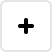
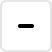
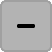
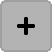
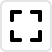
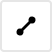
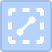
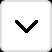
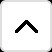
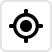

In [2]:
LetsPlot.setup_html()

#### Check default colors (changing theme and flavors)


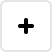
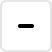
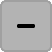
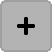
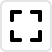
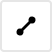
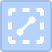
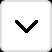
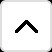
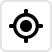

In [3]:
import numpy as np
from lets_plot import *
LetsPlot.setup_html()
np.random.seed(42)
n = 50
x = np.arange(n)
y = x + np.random.normal(scale=10, size=n)
p = ggplot({'x': x, 'y': y}, aes(x='x', y='y')) + geom_point() + geom_smooth()

##### With Themes

In [4]:
gggrid([
    p + theme_none() + ggtitle("theme_none()"),
    p + theme_grey() + ggtitle("theme_grey()"),
    p + theme_light() + ggtitle("theme_light()"),
    p + theme_classic() + ggtitle("theme_classic()"),
    p + theme_minimal() + ggtitle("theme_minimal()"),
    p + theme_minimal2() + ggtitle("theme_minimal2()"),
    p + theme_bw() + ggtitle("theme_bw()"),
], ncol=2)

##### With Flavors

In [5]:
from lets_plot.plot.core import FeatureSpec

def themeWithFlavor(plot, theme: FeatureSpec):
    return gggrid([
        plot + theme + ggtitle(theme.props().get("name")),
        plot + theme + flavor_darcula()+ ggtitle("darcula"),
        plot + theme + flavor_solarized_light()+ ggtitle("solarized_light"),
        plot + theme + flavor_solarized_dark()+ ggtitle("solarized_dark"),
        plot + theme + flavor_high_contrast_light()+ ggtitle("high_contrast_light"),
        plot + theme + flavor_high_contrast_dark()+ ggtitle("high_contrast_dark")
    ], ncol=2)

In [6]:
themeWithFlavor(p, theme_grey())

In [7]:
themeWithFlavor(p, theme_none())

##### Change theme colors - but they should not affect geometry colors

In [8]:
p + flavor_solarized_light() + theme_grey() + \
    theme(
        axis_line=element_line(size=4, color='#74add1'),
        panel_background=element_rect(fill='#abd9e9'),
        plot_background=element_rect(fill='#e0f3f8')   
    )

#### Named colors

In [9]:
pie_chart = ggplot({'name': ['pen', 'brush', 'paper'], 'slice': [1, 3, 3]}) + \
    geom_pie(aes(fill='name', slice='slice'),
             stat='identity',
             color='pen',
             tooltips='none', labels=layer_labels().line('@name')) + \
    scale_fill_manual(['pen', 'brush', 'paper'])

##### With Themes

In [10]:
gggrid([
    pie_chart + theme_none() + ggtitle("theme_none()"),
    pie_chart + theme_grey() + ggtitle("theme_grey()"),
    pie_chart + theme_light() + ggtitle("theme_light()"),
    pie_chart + theme_classic() + ggtitle("theme_classic()"),
    pie_chart + theme_minimal() + ggtitle("theme_minimal()"),
    pie_chart + theme_minimal2() + ggtitle("theme_minimal2()"),
    pie_chart + theme_bw() + ggtitle("theme_bw()"),
], ncol=2)

##### With Flavors

In [11]:
gggrid([
    pie_chart + ggtitle("Default"),
    pie_chart + flavor_darcula() + ggtitle("darcula"),
    pie_chart + flavor_solarized_light() + ggtitle("solarized_light"),
    pie_chart + flavor_solarized_dark() + ggtitle("solarized_dark"),
    pie_chart + flavor_high_contrast_light() + ggtitle("high_contrast_light"),
    pie_chart + flavor_high_contrast_dark() + ggtitle("high_contrast_dark")
], ncol = 2)

#### `theme(geom = element_geom(pen, brush, paper))`

In [12]:
pie_chart + theme(geom=element_geom(pen='red', brush='green', paper='blue'))

##### `theme() + flavor()` => use colors from flavor

In [13]:
pie_chart + theme(geom=element_geom(pen='red', brush='green', paper='blue')) + flavor_solarized_light()

##### `flavor() + theme()` => use colors from theme

In [14]:
pie_chart + flavor_solarized_light() + theme(geom=element_geom(pen='red', brush='green', paper='blue'))